In [1]:
import matplotlib.pyplot as plt
import numpy as  np
import pandas as pd

In [2]:
data = pd.read_csv('./OriginalData/training_input.csv',sep = ";")

In [3]:
target = pd.read_csv('./OriginalData/training_output.csv',sep =';')

In [4]:
import re

keys_return = []

for key in data.keys():
    g = re.split('return',key)
    if len(g)>1:
        keys_return += [key]
        
keys_volatility = []

for key in data.keys():
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]
        
times = []

for key in keys_return:
    g = re.split('return (.+)',key)
    if len(g)>1:
        times += [g[1]]

cumulative_directions = np.cumsum(data[keys_return].T,axis = 0)

In [16]:
for k in range(len(times)):
    data["cumulative_direction " + times[k]] = cumulative_directions.T['return '+times[k]]

keys_cumul = []

for key in data.keys():
    g = re.split('cumulative_direction',key)
    if len(g)>1:
        keys_cumul += [key]    

        
for date in range(1,2117+1):
    print(date)
    markets = np.mean(data.loc[data['date'] == date],axis = 0)[keys_cumul].values
    for k in range(markets.shape[0]):
        data.set_value(data['date'] == date,'cumul_market ' + times[k],markets[k])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

copy_data = data.copy()
copy_data = copy_data

y = target["TARGET"].values
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
    
X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

model = Ridge(alpha = 1.0)

model.fit(X_train,y_train)

KeyboardInterrupt: 

In [6]:
y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

0.26910157690952502

In [29]:
N_products = 318

mape = []
coefs_importances = []

data['TARGET'] = target['TARGET']

for n in range(1,1+N_products):
    
    product = data.loc[data["product_id"] == n]
    
    y = product["TARGET"].values

    del product["TARGET"]
    #del product["product_id"]
    #del product["date"]
    #del product["ID"]

    product = product.fillna(product.median())

    X = product.values

    from sklearn.model_selection import train_test_split

    X_train,X_test,y_train,y_test = train_test_split(X,y)

    from sklearn.linear_model import Ridge

    model = Ridge()
    model.fit(X_train,y_train)
    mape += [np.mean(np.abs(model.predict(X_test) - y_test)/y_test)]
    coefs_importances += [model.coef_]
mape = np.array(mape)
coefs_importances = np.array(coefs_importances)

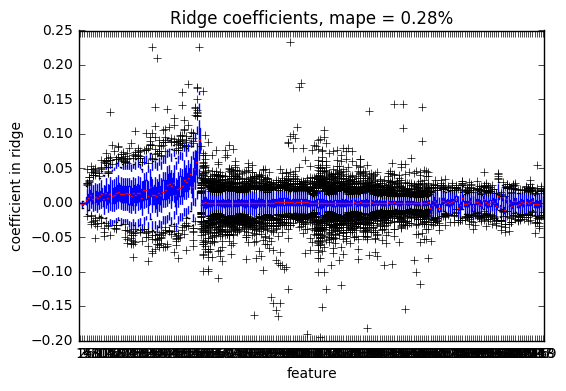

In [31]:
plt.clf()
plt.title("Ridge coefficients, mape = 0.28%")
plt.boxplot(coefs_importances)
plt.ylabel("coefficient in ridge")
plt.xlabel("feature")
plt.show()

In [37]:
keys_cumul = []

for key in data.keys():
    g = re.split('cumulative_direction ',key)
    if len(g)>1:
        keys_cumul += [key]

In [39]:
from sklearn.linear_model import HuberRegressor

mape = []
coefs_importances = []

for product in range(1,317+1):

    copy_data = data.loc[data['product_id'] == product].copy()
    copy_data = copy_data[keys_volatility+keys_cumul+['TARGET']]

    y = (copy_data["TARGET"].values)

    del copy_data["TARGET"]

    copy_data = copy_data.fillna(copy_data.median())

    X = copy_data.values

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,shuffle = False)

    model = HuberRegressor(epsilon = 1.0,max_iter = 1000)

    model.fit(X_train,y_train)

    mape += [np.mean(np.abs(model.predict(X_test) - y_test)/y_test)]
    coefs_importances += [model.coef_]
mape = np.array(mape)
coefs_importances = np.array(coefs_importances)

KeyboardInterrupt: 

In [41]:
mape

[0.23005750360086502,
 0.25166212296663509,
 0.24845466108670294,
 0.23988516712850197,
 0.26590430527258352,
 0.23873003083187691,
 0.23648934978462524,
 0.25899945475142738,
 0.23608865153532951,
 0.25147785328503253,
 0.22572631067130736,
 0.26463490650165405,
 0.27303777488463027,
 0.2503244092771883,
 0.22823246020163851,
 0.24491223282354804,
 0.23972294693643381,
 0.27442366386827499,
 0.35742475954111236,
 0.2778409113397638,
 0.25283883524503348,
 0.23059582751776048,
 0.25924638367247627,
 0.29053393575365294,
 0.22739461643508421,
 0.23665020340748544,
 0.23474787359797838,
 0.27228177206666032,
 0.23768663695359352,
 0.30867883887998299,
 0.57882729424116131,
 0.26413045293989096,
 0.2356155925602379,
 0.33996886382566988,
 0.24820086886242468,
 0.24097838191092882,
 0.24736594434213466,
 0.26968276528510704,
 0.29044514309246428,
 0.29689979012072149,
 0.25609589824629292,
 0.27283474129445195,
 0.25595512842638102,
 0.27105111967398049,
 0.27468410790052639,
 0.2336607606

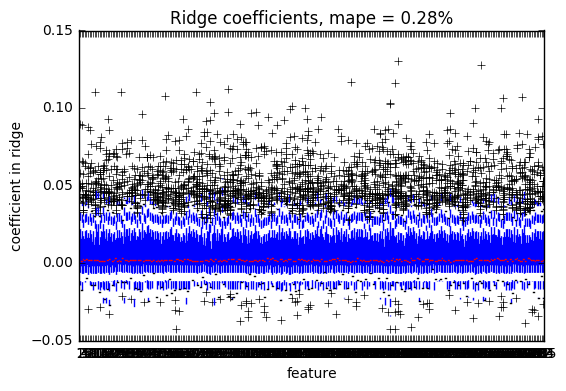

In [42]:
plt.clf()
plt.title("Ridge coefficients, mape = 0.28%")
plt.boxplot(coefs_importances)
plt.ylabel("coefficient in ridge")
plt.xlabel("feature")
plt.show()

In [58]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split

copy_data = data.loc[data['product_id'] == 1].copy()
copy_data = copy_data[keys_volatility+['TARGET']]

y = (copy_data["TARGET"].values)

del copy_data["TARGET"]
    
copy_data = copy_data.fillna(copy_data.median())
    
X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,shuffle = False)

model = LinearSVR(C = 1e-2,random_state = 1)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(np.mean(np.abs(y_pred - y_test)/y_test))

0.215803466992


In [71]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split

copy_data = data.loc[data['product_id'] == 10].copy()
copy_data = copy_data[keys_volatility+keys_cumul+['TARGET']]

y = (copy_data["TARGET"].values)

del copy_data["TARGET"]
    
copy_data = copy_data.fillna(copy_data.median())
    
X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,shuffle = False)

model = LinearSVR(C = 1e-3,random_state = 1)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(np.mean(np.abs(y_pred - y_test)/y_test))

0.240816925548


In [75]:
np.std(data[keys_return],axis = 1)

0         0.963675
1         0.903620
2         0.999314
3         0.974996
4         0.901911
5         0.990524
6         0.942081
7         0.911179
8         0.963141
9         0.950958
10        0.990524
11        0.957427
12        0.950958
13        0.950778
14        0.965808
15        0.950778
16        0.978507
17        0.970236
18        0.889853
19        0.989139
20        0.792902
21        0.965808
22        0.959395
23        0.810662
24        1.000000
25        0.916246
26        0.982180
27        0.963141
28        0.971649
29        0.961537
            ...   
636283    0.833333
636284    0.936239
636285    0.989139
636286    0.987642
636287    0.939895
636288    0.912683
636289    0.833185
636290    0.932753
636291    0.923887
636292    0.986361
636293    0.890623
636294    0.677130
636295    0.912683
636296    0.912683
636297    0.943718
636298    0.905894
636299    0.904189
636300    0.932753
636301    0.932753
636302    0.948069
636303    0.882889
636304    0.

In [76]:
data['std'] = np.std(data[keys_return],axis = 1)

In [88]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split

copy_data = data.loc[data['std'] >= 0.9].copy()
copy_data = copy_data[keys_volatility+['TARGET']+['std']]

y = (copy_data["TARGET"].values)

del copy_data["TARGET"]
    
copy_data = copy_data.fillna(copy_data.median())
    
X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,shuffle = False)

model = LinearSVR(C = 1e-2,random_state = 1)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(np.mean(np.abs(y_pred - y_test)/y_test))

0.223536535876


In [89]:
data.loc[data['std'] >= 0.9]

,ID,date,product_id,volatility 09:30:00,volatility 09:35:00,volatility 09:40:00,volatility 09:45:00,volatility 09:50:00,volatility 09:55:00,volatility 10:00:00,...,cumul_market 13:20:00,cumul_market 13:25:00,cumul_market 13:30:00,cumul_market 13:35:00,cumul_market 13:40:00,cumul_market 13:45:00,cumul_market 13:50:00,cumul_market 13:55:00,TARGET,std
0,1,1,1,0.662737,0.716896,0.698601,0.480172,0.623665,0.201876,0.327206,...,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.134168,0.963675
1,2,1,2,0.285394,0.379560,0.094858,0.094794,0.055315,0.173994,0.102745,...,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.046126,0.903620
2,3,1,3,1.151646,1.093562,1.833443,0.595823,0.310177,0.792310,0.401979,...,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.144312,0.999314
3,4,1,4,0.835260,0.329615,0.340366,0.216692,0.350371,0.247594,0.341194,...,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.130176,0.974996
4,5,1,5,0.274185,0.061076,0.010168,0.060890,0.000000,0.213162,0.162763,...,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.085873,0.901911
5,6,1,6,1.196894,0.447793,0.217333,0.460426,0.142273,0.332694,0.078081,...,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.122724,0.990524
6,7,1,7,0.404367,0.461279,0.230853,0.173033,0.216425,0.263001,0.449498,...,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.150885,0.942081
7,8,1,8,0.427583,0.332903,0.647757,0.142191,0.173788,0.110555,0.173730,...,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.150703,0.911179
8,9,1,9,0.261116,0.714536,0.196523,0.261591,0.143795,0.084946,0.143915,...,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.102048,0.963141
9,10,1,10,0.256359,0.359924,0.198624,0.340704,0.232150,0.436671,0.209140,...,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.163724,0.950958


In [94]:
copy_data = data.loc[data['std'] >= 0.9].copy()
copy_data = copy_data[keys_volatility+['TARGET']+['std']]

y = (copy_data["TARGET"].values)

del copy_data["TARGET"]

copy_data = copy_data.fillna(copy_data.median())

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,shuffle = False)

model = HuberRegressor(epsilon = 1.0,max_iter = 1000)

model.fit(X_train,y_train)

print(np.mean(np.abs(model.predict(X_test) - y_test)/y_test))
coefs_importances = model.coef_

0.2242652942


In [95]:
copy_data = data.loc[data['std'] <= 0.9].copy()
copy_data = copy_data[keys_volatility+['TARGET']+['std']]

y = (copy_data["TARGET"].values)

del copy_data["TARGET"]

copy_data = copy_data.fillna(copy_data.median())

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,shuffle = False)

model = HuberRegressor(epsilon = 1.0,max_iter = 1000)

model.fit(X_train,y_train)

print(np.mean(np.abs(model.predict(X_test) - y_test)/y_test))
coefs_importances = model.coef_

0.297300162


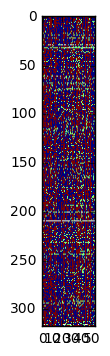

In [99]:
plt.clf()
plt.imshow(data[keys_return].loc[data['date'] == 1])
plt.show()

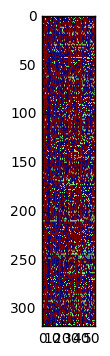

In [100]:
plt.clf()
plt.imshow(data[keys_return].loc[data['date'] == 10])
plt.show()

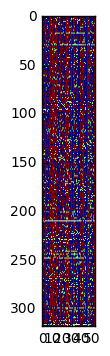

In [101]:
plt.clf()
plt.imshow(data[keys_return].loc[data['date'] == 100])
plt.show()

In [102]:
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
import numpy as np

Using TensorFlow backend.


ImportError: No module named 'tensorflow'

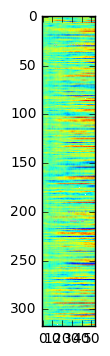

In [104]:
plt.clf()
plt.imshow(data[keys_cumul].loc[data['date'] == 10])
plt.show()

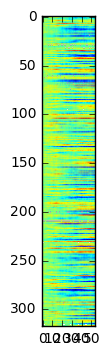

In [105]:
plt.clf()
plt.imshow(data[keys_cumul].loc[data['date'] == 1])
plt.show()

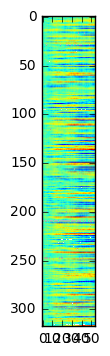

In [106]:
plt.clf()
plt.imshow(data[keys_cumul].loc[data['date'] == 100])
plt.show()

In [108]:
del data['TARGET']

In [124]:
list_imgs = []

for date in range(1,2117+1):
    print(date)
    img = data[keys_cumul].loc[data['date'] == date].values
    img = img.reshape(img.shape[0]*img.shape[1])
    list_imgs += [img]
list_imgs = np.array(list_imgs)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [109]:
data.to_csv('preprocess.csv',index = False)

In [125]:
data

,ID,date,product_id,volatility 09:30:00,volatility 09:35:00,volatility 09:40:00,volatility 09:45:00,volatility 09:50:00,volatility 09:55:00,volatility 10:00:00,...,cumul_market 13:15:00,cumul_market 13:20:00,cumul_market 13:25:00,cumul_market 13:30:00,cumul_market 13:35:00,cumul_market 13:40:00,cumul_market 13:45:00,cumul_market 13:50:00,cumul_market 13:55:00,std
0,1,1,1,0.662737,0.716896,0.698601,0.480172,0.623665,0.201876,0.327206,...,-1.313291,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.963675
1,2,1,2,0.285394,0.379560,0.094858,0.094794,0.055315,0.173994,0.102745,...,-1.313291,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.903620
2,3,1,3,1.151646,1.093562,1.833443,0.595823,0.310177,0.792310,0.401979,...,-1.313291,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.999314
3,4,1,4,0.835260,0.329615,0.340366,0.216692,0.350371,0.247594,0.341194,...,-1.313291,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.974996
4,5,1,5,0.274185,0.061076,0.010168,0.060890,0.000000,0.213162,0.162763,...,-1.313291,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.901911
5,6,1,6,1.196894,0.447793,0.217333,0.460426,0.142273,0.332694,0.078081,...,-1.313291,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.990524
6,7,1,7,0.404367,0.461279,0.230853,0.173033,0.216425,0.263001,0.449498,...,-1.313291,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.942081
7,8,1,8,0.427583,0.332903,0.647757,0.142191,0.173788,0.110555,0.173730,...,-1.313291,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.911179
8,9,1,9,0.261116,0.714536,0.196523,0.261591,0.143795,0.084946,0.143915,...,-1.313291,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.963141
9,10,1,10,0.256359,0.359924,0.198624,0.340704,0.232150,0.436671,0.209140,...,-1.313291,-0.921384,-1.076433,-0.223975,-0.667722,-1.452532,-1.529968,-2.168790,-2.009524,0.950958


In [129]:
list_imgs[0].shape

(17172,)

In [131]:
data[keys_cumul].loc[data['date'] == date].values.shape

(318, 54)

In [132]:
318*54

17172

In [163]:
res = pd.DataFrame()
for k in range(2117):
    res = pd.concat([res, pd.DataFrame(list_imgs[k]).T])

In [166]:
data['TARGET'] = target['TARGET']

In [192]:
target_1 = (data.loc[data['product_id'] == 1]['TARGET'] >= 0.25)*1
target_1.to_csv('target_1.csv',sep =';',index = False)
target_10 = (data.loc[data['product_id'] == 10]['TARGET']>= 0.25)*1
target_10.to_csv('target_10.csv',sep =';',index = False)
target_100 = (data.loc[data['product_id'] == 100]['TARGET']>= 0.25)*1
target_100.to_csv('target_100.csv',sep =';',index = False)

In [170]:
res.to_csv('preprocess.csv',sep = ';',index = False)

In [176]:
pd.read_csv('preprocess.csv',sep   =';')

,0,1,2,3,4,5,6,7,8,9,...,17162,17163,17164,17165,17166,17167,17168,17169,17170,17171
0,-1.0,-2.0,-3.0,-4.0,-3.0,-4.0,-3.0,-2.0,-3.0,-4.0,...,5.0,4.0,5.0,5.0,6.0,7.0,8.0,9.0,8.0,7.0
1,1.0,2.0,3.0,4.0,5.0,6.0,5.0,4.0,3.0,2.0,...,-2.0,-3.0,-2.0,-2.0,-1.0,-1.0,-2.0,-2.0,-1.0,0.0
2,1.0,0.0,-1.0,-2.0,-3.0,-3.0,-2.0,-1.0,-2.0,-1.0,...,-4.0,-3.0,-4.0,-3.0,-4.0,-5.0,-4.0,-3.0,-4.0,-5.0
3,1.0,0.0,-1.0,-2.0,-1.0,-1.0,-2.0,-1.0,-2.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.0,-1.0,0.0,0.0,1.0,1.0,2.0,3.0,4.0,...,9.0,10.0,11.0,12.0,11.0,12.0,13.0,14.0,15.0,16.0
5,1.0,0.0,-1.0,0.0,0.0,1.0,2.0,2.0,3.0,2.0,...,0.0,1.0,1.0,0.0,-1.0,-2.0,-1.0,-2.0,-2.0,-3.0
6,1.0,2.0,3.0,4.0,3.0,4.0,3.0,2.0,3.0,4.0,...,0.0,1.0,2.0,3.0,4.0,5.0,4.0,3.0,2.0,3.0
7,0.0,1.0,0.0,1.0,2.0,1.0,0.0,-1.0,0.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,1.0,2.0,...,5.0,5.0,4.0,4.0,5.0,5.0,6.0,5.0,6.0,5.0
9,1.0,0.0,1.0,2.0,3.0,2.0,1.0,0.0,1.0,2.0,...,2.0,2.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0


In [145]:
list_imgs.as_matrix()

AttributeError: 'numpy.ndarray' object has no attribute 'as_matrix'

In [193]:
target_1

0         0
318       1
636       1
954       0
1202      0
1520      0
1838      1
2156      0
2448      0
2766      0
3084      0
3402      1
3720      0
4038      0
4356      0
4592      0
4839      0
5157      0
5473      0
5791      1
6109      1
6406      0
6654      0
6972      0
7221      0
7539      1
7786      0
8104      0
8422      0
8671      1
         ..
627313    0
627610    1
627928    0
628175    0
628493    1
628811    0
629128    1
629366    0
629683    0
630001    0
630319    0
630568    0
630865    1
631183    0
631431    1
631749    0
632067    0
632363    0
632681    0
632999    0
633317    0
633565    1
633881    0
634157    0
634475    0
634723    0
635041    0
635359    0
635677    1
635995    0
Name: TARGET, dtype: int32

In [181]:
pd.read_csv('target_1.csv',header = None)

,0
0,0.134168
1,0.265375
2,0.506285
3,0.141991
4,0.147988
5,0.125183
6,0.324702
7,0.091236
8,0.161469
9,0.246288


In [185]:
17172/(36*3)

159.0

In [186]:
36*3

108

In [189]:
pd.read_csv('preprocess.csv',sep = ';')

,0,1,2,3,4,5,6,7,8,9,...,17162,17163,17164,17165,17166,17167,17168,17169,17170,17171
0,-1.0,-2.0,-3.0,-4.0,-3.0,-4.0,-3.0,-2.0,-3.0,-4.0,...,5.0,4.0,5.0,5.0,6.0,7.0,8.0,9.0,8.0,7.0
1,1.0,2.0,3.0,4.0,5.0,6.0,5.0,4.0,3.0,2.0,...,-2.0,-3.0,-2.0,-2.0,-1.0,-1.0,-2.0,-2.0,-1.0,0.0
2,1.0,0.0,-1.0,-2.0,-3.0,-3.0,-2.0,-1.0,-2.0,-1.0,...,-4.0,-3.0,-4.0,-3.0,-4.0,-5.0,-4.0,-3.0,-4.0,-5.0
3,1.0,0.0,-1.0,-2.0,-1.0,-1.0,-2.0,-1.0,-2.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.0,-1.0,0.0,0.0,1.0,1.0,2.0,3.0,4.0,...,9.0,10.0,11.0,12.0,11.0,12.0,13.0,14.0,15.0,16.0
5,1.0,0.0,-1.0,0.0,0.0,1.0,2.0,2.0,3.0,2.0,...,0.0,1.0,1.0,0.0,-1.0,-2.0,-1.0,-2.0,-2.0,-3.0
6,1.0,2.0,3.0,4.0,3.0,4.0,3.0,2.0,3.0,4.0,...,0.0,1.0,2.0,3.0,4.0,5.0,4.0,3.0,2.0,3.0
7,0.0,1.0,0.0,1.0,2.0,1.0,0.0,-1.0,0.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,1.0,2.0,...,5.0,5.0,4.0,4.0,5.0,5.0,6.0,5.0,6.0,5.0
9,1.0,0.0,1.0,2.0,3.0,2.0,1.0,0.0,1.0,2.0,...,2.0,2.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
